In [3]:
import numpy as np
import numpy.linalg as la


#the structure of these disks will be [a_i,...,v_i,sigma_i]
#each a_i will be a 3x1 matrix, containing a certain instance of that variable

#[a,b,c,e,f|x,y,z,u,v]
#[0,1,2,3,4|5,6,7,8,9]

#D_1 = a,0,0,e,f,x,0,z,0,v
#D_2 = a,b,0,0,f,x,y,0,u,0
#D_3 = a,b,c,0,0,0,y,z,0,v
#D_4 = 0,b,c,e,0,x,0,z,u,0
#D_5 = 0,0,c,e,f,0,y,0,u,v

#disk gets updated, it is stored as a vector, containing our information about what disks went into it
a=[1,1,1,0,0]
b=[0,1,1,1,0]
c=[0,0,1,1,1]
e=[1,0,0,1,1]
f=[1,1,0,0,1]
x=[1,1,0,1,0]
y=[0,1,1,0,1]
z=[1,0,1,1,0]
u=[0,1,0,1,1]
v=[1,0,1,0,1]

var_nums = [a,b,c,e,f,x,y,z,u,v]
#now I can get a variable number from this array


D=[a,b,c,e,f,x,y,z,u,v]
D_1=[]
D_2=[]
D_3=[]
D_4=[]
D_5=[]
for i in range(len(D)):
    var = D[i]
    D_1.append(var[0])
    D_2.append(2*var[1])
    D_3.append(4*var[2])
    D_4.append(8*var[3])
    D_5.append(16*var[4])


dDictionary ={1:D_1, 2:D_2, 3:D_3, 4:D_4, 5:D_5}


D_1 = np.array(D_1)
D_2 = np.array(D_2)
D_3 = np.array(D_3)
D_4 = np.array(D_4)
D_5 = np.array(D_5)

def and_vector(x,y):
    #this takes the entrywise min of two vectors
    new = np.empty_like(x)
    for i in range(len(x)):#will change to len(x)-1
        if x[i]*y[i]>0:
            new[i]=x[i]
        else:
            new[i]=0
    return new


def variable_number(D,place,letter):
    #this will figure out which number the variable corresponds to - example: the third instance of C is C5
    number = 1
    temp = 0
    toget = 0
    index = var_nums.index(letter)
    if D_1[index]>0:
        if temp<place:
            temp+=1
        if temp==place:
            temp+=1
            toget=number
    number +=1
    if D_2[index]>0:
        if temp<place:
            temp+=1
        if temp==place:
            temp+=1
            toget=number
    number +=1
    if D_3[index]>0:
        if temp<place:
            temp+=1
        if temp==place:
            temp+=1
            toget=number
    number +=1
    if D_4[index]>0:
        if temp<place:
            temp+=1
        if temp==place:
            temp+=1
            toget=number
    number +=1
    if D_5[index]>0:
        if temp<place:
            temp+=1
        if temp==place:
            temp+=1
            toget=number
    number +=1
    return toget



def entropy(disk):
    #this will add the information from each entry of the disk
    #once we know 20 pieces of information, we know the contents of every disk
    entropy = 0
    for i in range(len(disk)):#will change to len(disk)-1 when I consider the last element to be sigma
        if disk[i]>0 and disk[i]<7:
            entropy+=1
        elif disk[i]==7:
            entropy+=2
    if entropy>=20:
        print("You know the entire message!")
    else:
        print(f"You know {entropy} bits of information")
    return entropy


def shared_info(source, target):
    #this function should give back a vector representing the information that is shared between source and target
    #it will also return an index, indicating where the original source was
    shared = and_vector(source,target)
    return shared
    
    
def combined_info(disk1,disk2):
    new = np.copy(disk1)
    for i in range(len(disk1)):
        if disk1[i]*disk2[i]==0:
            new[i]=(max(disk1[i],disk2[i]))
        elif disk1[i]*disk2[i]>0 and disk1[i]!=disk2[i]:
            new[i]=7
    return new
#     for variable in range(len(disk1)):
#         new[variable]=and_vector(disk1[variable],disk2[variable])
#     return new_disk

# print(new_disk(D_1,D_2))

#to-do: 
#       make a sigma matrix
#       write down each sigma value, use them in the disks

#main function will input the starting disks, then run through the entropies one-by-one

#shared info is GOOD
#variable_number is GOOD
#combined_info is GOOD
#entropy is GOOD
D=np.array(D)
np.transpose(D)


array([[1, 0, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 1, 1, 1, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 1, 0, 1, 1]])

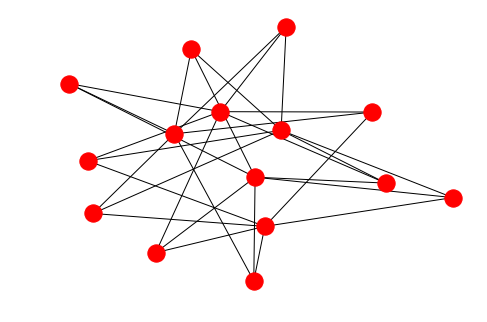

In [4]:
import numpy as np
import networkx as nx
from matplotlib import pyplot, patches

v1=[1,0,0,0,0]
v2=[0,1,0,0,0]
v3=[0,0,1,0,0]
v4=[0,0,0,1,0]
v5=[0,0,0,0,1]
v0=[0,0,0,0,0]

mat1=[v1,v2,v3,v4,v5]
mat2=[v2,v3,v4,v5,v1]
mat3=[v3,v4,v5,v1,v2]
mat4=[v4,v5,v1,v2,v3]
mat5=[v5,v1,v2,v3,v4]
mat0=[v0,v0,v0,v0,v0]
mat1=np.array(mat1)
mat2=np.array(mat2)
mat3=np.array(mat3)
mat4=np.array(mat4)
mat5=np.array(mat5)
mat0=np.array(mat0)

big_mat = np.zeros(shape=(15,35))

for i in range(5):
    for j in range(5):
        big_mat[i][j]=mat1[i][j]
        big_mat[i][j+5]=mat5[i][j]
        big_mat[i][j+10]=mat2[i][j]
        big_mat[i+5][j+15]=mat1[i][j]
        big_mat[i+5][j+20]=mat4[i][j]
        big_mat[i+5][j+25]=mat3[i][j]
        big_mat[i+10][j]=mat2[i][j]
        big_mat[i+10][j+5]=mat4[i][j]
        big_mat[i+10][j+10]=mat2[i][j]
        big_mat[i+10][j+15]=mat3[i][j]
        big_mat[i+10][j+20]=mat2[i][j]
        big_mat[i+10][j+25]=mat3[i][j]
        big_mat[i+10][j+30]=mat1[i][j]
am = (np.dot(big_mat, big_mat.T) > 0).astype(int)
np.fill_diagonal(am, 0)
G = nx.from_numpy_matrix(am) 
nx.draw(G)